In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import galsim
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Load generator model
generative_model = hub.Module('../modules/flow/1545896204/generator')

In [5]:
print(generative_model.get_attached_message("stamp_size", tf.train.Int64List))

value: 64

In [6]:
print(generative_model.get_attached_message("pixel_size", tf.train.FloatList))

value: 0.029999999329447746



In [7]:
mag_auto = tf.placeholder(tf.float32)
flux_radius = tf.placeholder(tf.float32)
zphot = tf.placeholder(tf.float32)
ims_in = tf.placeholder(tf.float32, shape=(None,64,64,1))

ims = generative_model({'mag_auto':mag_auto, 'flux_radius':flux_radius, 'zphot':zphot })

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [8]:
cat = galsim.COSMOSCatalog(dir='/usr/local/share/galsim/COSMOS_25.2_training_sample')


gal = cat.makeGalaxy(0)
psf = gal.original_psf
cgal = galsim.Convolve(gal, gal.original_psf)

In [9]:
canvas = galsim.ImageF(64,64)
cgal.drawImage(canvas);

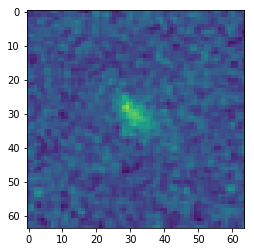

In [10]:
imshow(canvas.array,vmin=-0.01,vmax=0.03)

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [21]:
im = sess.run(ims, {mag_auto : atleast_1d(cat.getParametricRecord(0)['mag_auto']),
               flux_radius : atleast_1d(cat.getParametricRecord(0)['flux_radius']),
               zphot : atleast_1d(cat.getParametricRecord(0)['zphot'])})

imin = galsim.Image(np.ascontiguousarray(im[0].reshape((64,64)).astype(np.float64)),
                              scale=0.03)
iim= galsim.InterpolatedImage(imin,
                        pad_factor=4,
                        noise_pad_size=0)

res = galsim.Convolve(iim, gal.original_psf)

canvas = galsim.ImageF(64,64, scale=0.03)
res.drawImage(canvas);
cgal.noise.applyTo(canvas);

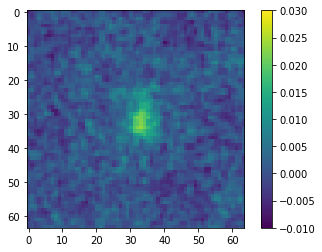

In [22]:
imshow(canvas.array,vmin=-0.01,vmax=0.03); colorbar()